# Quickstart

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd
from dataclasses import dataclass
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [3]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


## View Data

(9, torch.Size([1, 28, 28]))

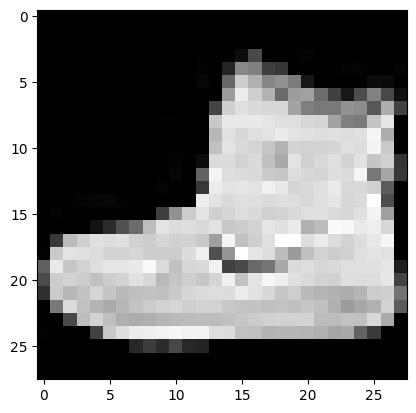

In [4]:
datum = train_dataloader.dataset[0]

img = datum[0].numpy()
plt.imshow(img[0, :, :], cmap="gray")

datum[1], datum[0].shape

In [5]:
test_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
test_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
test_data.targets.shape

torch.Size([10000])

In [8]:
pd.Series(test_data.targets).value_counts()

9    1000
2    1000
1    1000
6    1000
4    1000
5    1000
7    1000
3    1000
8    1000
0    1000
dtype: int64

In [9]:
pd.Series(training_data.targets).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

## Model

In [10]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [12]:
loss_fn

CrossEntropyLoss()

In [13]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [14]:
?train_dataloader.batch_sampler

Type:        BatchSampler
String form: <torch.utils.data.sampler.BatchSampler object at 0xffff19b0e770>
Length:      938
File:        /usr/local/lib/python3.10/site-packages/torch/utils/data/sampler.py
Docstring:  
Wraps another sampler to yield a mini-batch of indices.

Args:
    sampler (Sampler or Iterable): Base sampler. Can be any iterable object
    batch_size (int): Size of mini-batch.
    drop_last (bool): If ``True``, the sampler will drop the last batch if
        its size would be less than ``batch_size``

Example:
    >>> list(BatchSampler(SequentialSampler(range(10)), batch_size=3, drop_last=False))
    [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9]]
    >>> list(BatchSampler(SequentialSampler(range(10)), batch_size=3, drop_last=True))
    [[0, 1, 2], [3, 4, 5], [6, 7, 8]]

In [15]:
?optimizer.zero_grad

Signature: optimizer.zero_grad(set_to_none: bool = True) -> None
Docstring:
Resets the gradients of all optimized :class:`torch.Tensor` s.

Args:
    set_to_none (bool): instead of setting to zero, set the grads to None.
        This will in general have lower memory footprint, and can modestly improve performance.
        However, it changes certain behaviors. For example:
        1. When the user tries to access a gradient and perform manual ops on it,
        a None attribute or a Tensor full of 0s will behave differently.
        2. If the user requests ``zero_grad(set_to_none=True)`` followed by a backward pass, ``.grad``\ s
        are guaranteed to be None for params that did not receive a gradient.
        3. ``torch.optim`` optimizers have a different behavior if the gradient is 0 or None
        (in one case it does the step with a gradient of 0 and in the other it skips
        the step altogether).
File:      /usr/local/lib/python3.10/site-packages/torch/optim/optimizer.py


In [16]:
?loss_fn

Signature:      loss_fn(*args, **kwargs)
Type:           CrossEntropyLoss
String form:    CrossEntropyLoss()
File:           /usr/local/lib/python3.10/site-packages/torch/nn/modules/loss.py
Docstring:     
This criterion computes the cross entropy loss between input logits
and target.

It is useful when training a classification problem with `C` classes.
If provided, the optional argument :attr:`weight` should be a 1D `Tensor`
assigning weight to each of the classes.
This is particularly useful when you have an unbalanced training set.

The `input` is expected to contain the unnormalized logits for each class (which do `not` need
to be positive or sum to 1, in general).
`input` has to be a Tensor of size :math:`(C)` for unbatched input,
:math:`(minibatch, C)` or :math:`(minibatch, C, d_1, d_2, ..., d_K)` with :math:`K \geq 1` for the
`K`-dimensional case. The last being useful for higher dimension inputs, such
as computing cross entropy loss per-pixel for 2D images.

The `target` that 

In [17]:
?torch.no_grad

Init signature: torch.no_grad() -> None
Docstring:     
Context-manager that disables gradient calculation.

Disabling gradient calculation is useful for inference, when you are sure
that you will not call :meth:`Tensor.backward()`. It will reduce memory
consumption for computations that would otherwise have `requires_grad=True`.

In this mode, the result of every computation will have
`requires_grad=False`, even when the inputs have `requires_grad=True`.
There is an exception! All factory functions, or functions that create
a new Tensor and take a requires_grad kwarg, will NOT be affected by
this mode.

This context manager is thread local; it will not affect computation
in other threads.

Also functions as a decorator.

.. note::
    No-grad is one of several mechanisms that can enable or
    disable gradients locally see :ref:`locally-disable-grad-doc` for
    more information on how they compare.

.. note::
    This API does not apply to :ref:`forward-mode AD <forward-mode-ad>`.
  

In [18]:
?model.eval

Signature: model.eval() -> ~T
Docstring:
Sets the module in evaluation mode.

This has any effect only on certain modules. See documentations of
particular modules for details of their behaviors in training/evaluation
mode, if they are affected, e.g. :class:`Dropout`, :class:`BatchNorm`,
etc.

This is equivalent with :meth:`self.train(False) <torch.nn.Module.train>`.

See :ref:`locally-disable-grad-doc` for a comparison between
`.eval()` and several similar mechanisms that may be confused with it.

Returns:
    Module: self
File:      /usr/local/lib/python3.10/site-packages/torch/nn/modules/module.py
Type:      method

In [19]:
@dataclass
class TrainResults:
    average_batch_loss: float
    accuracy: float
        
@dataclass
class TestResults:
    average_batch_loss: float
    accuracy: float

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    model.train()
    
    train_loss, n_correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss, current = loss.item(), (batch + 1) * len(X)
        train_loss += loss
        n_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        if batch % 100 == 0:
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    avg_loss = train_loss / num_batches
    acc = n_correct / size
    return TrainResults(avg_loss, acc)
            
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, n_correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            n_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    avg_loss = test_loss / num_batches
    acc = n_correct / size
    
    print(f"Test Error: \n Accuracy: {(100*acc):>0.1f}%, Avg loss: {avg_loss:>8f} \n")

    return TestResults(avg_loss, acc)

In [20]:
epochs = 5

metrics = {
    "train_avg_loss": [],
    "train_acc": [],
    "test_avg_loss": [],
    "test_acc": [],
}
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    tr_res = train(train_dataloader, model, loss_fn, optimizer)
    ts_res = test(test_dataloader, model, loss_fn)

    metrics["train_avg_loss"].append(tr_res.average_batch_loss)
    metrics["train_acc"].append(tr_res.accuracy)
    metrics["test_avg_loss"].append(ts_res.average_batch_loss)
    metrics["test_acc"].append(ts_res.accuracy)
    
print("Done!")

Epoch 1
-------------------------------
loss: 2.312420  [   64/60000]
loss: 2.290146  [ 6464/60000]
loss: 2.268558  [12864/60000]
loss: 2.257037  [19264/60000]
loss: 2.243084  [25664/60000]
loss: 2.211598  [32064/60000]
loss: 2.220700  [38464/60000]
loss: 2.185345  [44864/60000]
loss: 2.183535  [51264/60000]
loss: 2.138798  [57664/60000]
Test Error: 
 Accuracy: 33.8%, Avg loss: 2.140097 

Epoch 2
-------------------------------
loss: 2.163013  [   64/60000]
loss: 2.143270  [ 6464/60000]
loss: 2.082194  [12864/60000]
loss: 2.097659  [19264/60000]
loss: 2.040455  [25664/60000]
loss: 1.977847  [32064/60000]
loss: 2.008655  [38464/60000]
loss: 1.925280  [44864/60000]
loss: 1.935935  [51264/60000]
loss: 1.853624  [57664/60000]
Test Error: 
 Accuracy: 50.3%, Avg loss: 1.856224 

Epoch 3
-------------------------------
loss: 1.903839  [   64/60000]
loss: 1.858819  [ 6464/60000]
loss: 1.743827  [12864/60000]
loss: 1.784119  [19264/60000]
loss: 1.674131  [25664/60000]
loss: 1.630689  [32064/600

Text(0.5, 1.0, 'Loss over epoc')

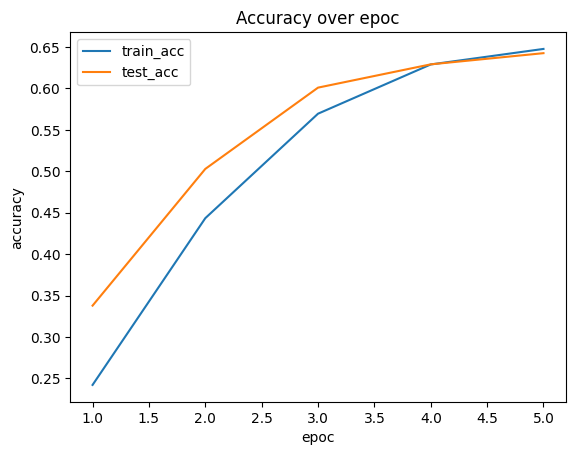

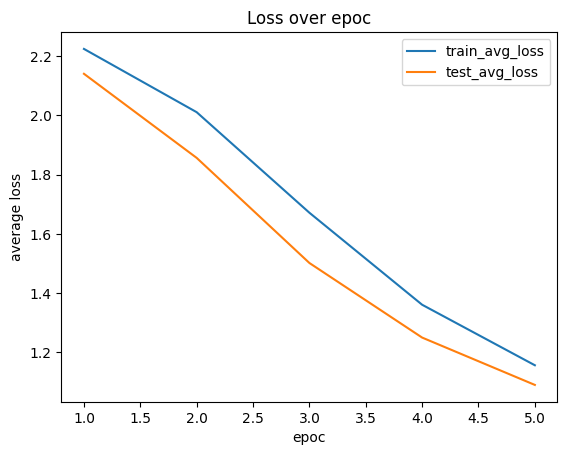

In [21]:
metrics_df = pd.DataFrame(metrics)
metrics_df.index = metrics_df.index + 1

ax = metrics_df[["train_acc", "test_acc"]].plot()
ax.set_ylabel("accuracy")
ax.set_xlabel("epoc")
ax.set_title("Accuracy over epoc")

ax = metrics_df[["train_avg_loss", "test_avg_loss"]].plot()
ax.set_ylabel("average loss")
ax.set_xlabel("epoc")
ax.set_title("Loss over epoc")

## Serializing

In [22]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [23]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [25]:
datum = train_dataloader.dataset[0]
img = datum[0].numpy()
img.shape

(1, 28, 28)

In [28]:
input_tensor = torch.randn(*img.shape)
onnx_program = torch.onnx.dynamo_export(model, input_tensor)
onnx_program.save("fashion_mnist.onnx")

/usr/local/lib/python3.10/site-packages/torch/onnx/_internal/exporter.py:130: UserWarning: torch.onnx.dynamo_export only implements opset version 18 for now. If you need to use a different opset version, please register them with register_custom_op.
  warnings.warn(


## Evaluation

In [29]:
classes = test_data.classes

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


Text(0.5, 1.0, 'Train Confusion Matrix')

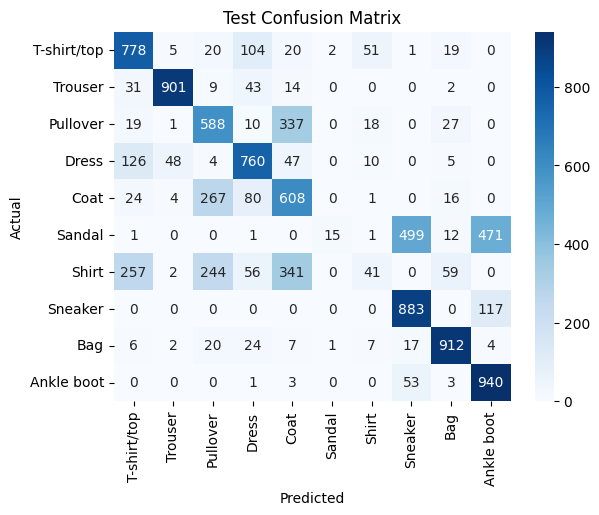

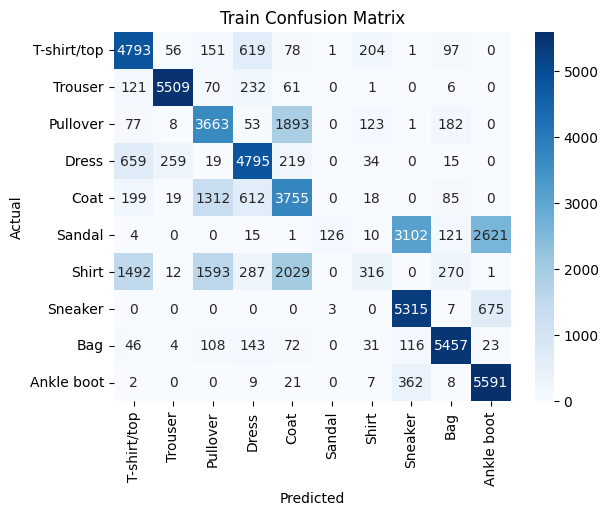

In [30]:
classes = test_data.classes

def predict(model, dataloader):
    model.eval()
    
    predictions = []
    actuals = []
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred_scores = model(X)
            predicted, actual = pred_scores.argmax(1), y
            predictions.append(predicted.numpy())
            actuals.append(actual.numpy())

    df = pd.DataFrame({
        "predicted": np.concatenate(predictions),
        "actual": np.concatenate(actuals),
    })
    return df

def confusion(predictions, classes):
    cm = confusion_matrix(predictions["actual"], predictions["predicted"])

    plt.figure()
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    return ax

test_pred = predict(model, test_dataloader)
ax = confusion(test_pred, classes)
ax.set_title("Test Confusion Matrix")

train_pred = predict(model, train_dataloader)
ax = confusion(train_pred, classes)
ax.set_title("Train Confusion Matrix")